In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error

In [11]:
# Data Collecting Part

wine_data = pd.read_csv("wine.csv")

wine_data

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [12]:
# Data Cleaning Part

def cleaning_data(wine_data):
    # Check for missing values
    print("Missing Values:\n", wine_data.isnull().sum())

    # No missing values, continue with data exploration
    print("\nData Types:\n", wine_data.dtypes)

cleaning_data(wine_data)

Missing Values:
 Wine                    0
Alcohol                 0
Malic.acid              0
Ash                     0
Acl                     0
Mg                      0
Phenols                 0
Flavanoids              0
Nonflavanoid.phenols    0
Proanth                 0
Color.int               0
Hue                     0
OD                      0
Proline                 0
dtype: int64

Data Types:
 Wine                      int64
Alcohol                 float64
Malic.acid              float64
Ash                     float64
Acl                     float64
Mg                        int64
Phenols                 float64
Flavanoids              float64
Nonflavanoid.phenols    float64
Proanth                 float64
Color.int               float64
Hue                     float64
OD                      float64
Proline                   int64
dtype: object


In [13]:
# Data Exploration Part

def exploration_data(wine_data):
    print(f"\nDataset shape: {wine_data.shape[0]} rows, {wine_data.shape[1]} columns\n")
    print("First 10 rows:")
    display(wine_data.head(10))

    print("Describe the data:")
    display(wine_data.describe())

exploration_data(wine_data)


Dataset shape: 178 rows, 14 columns

First 10 rows:


,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


Describe the data:


,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


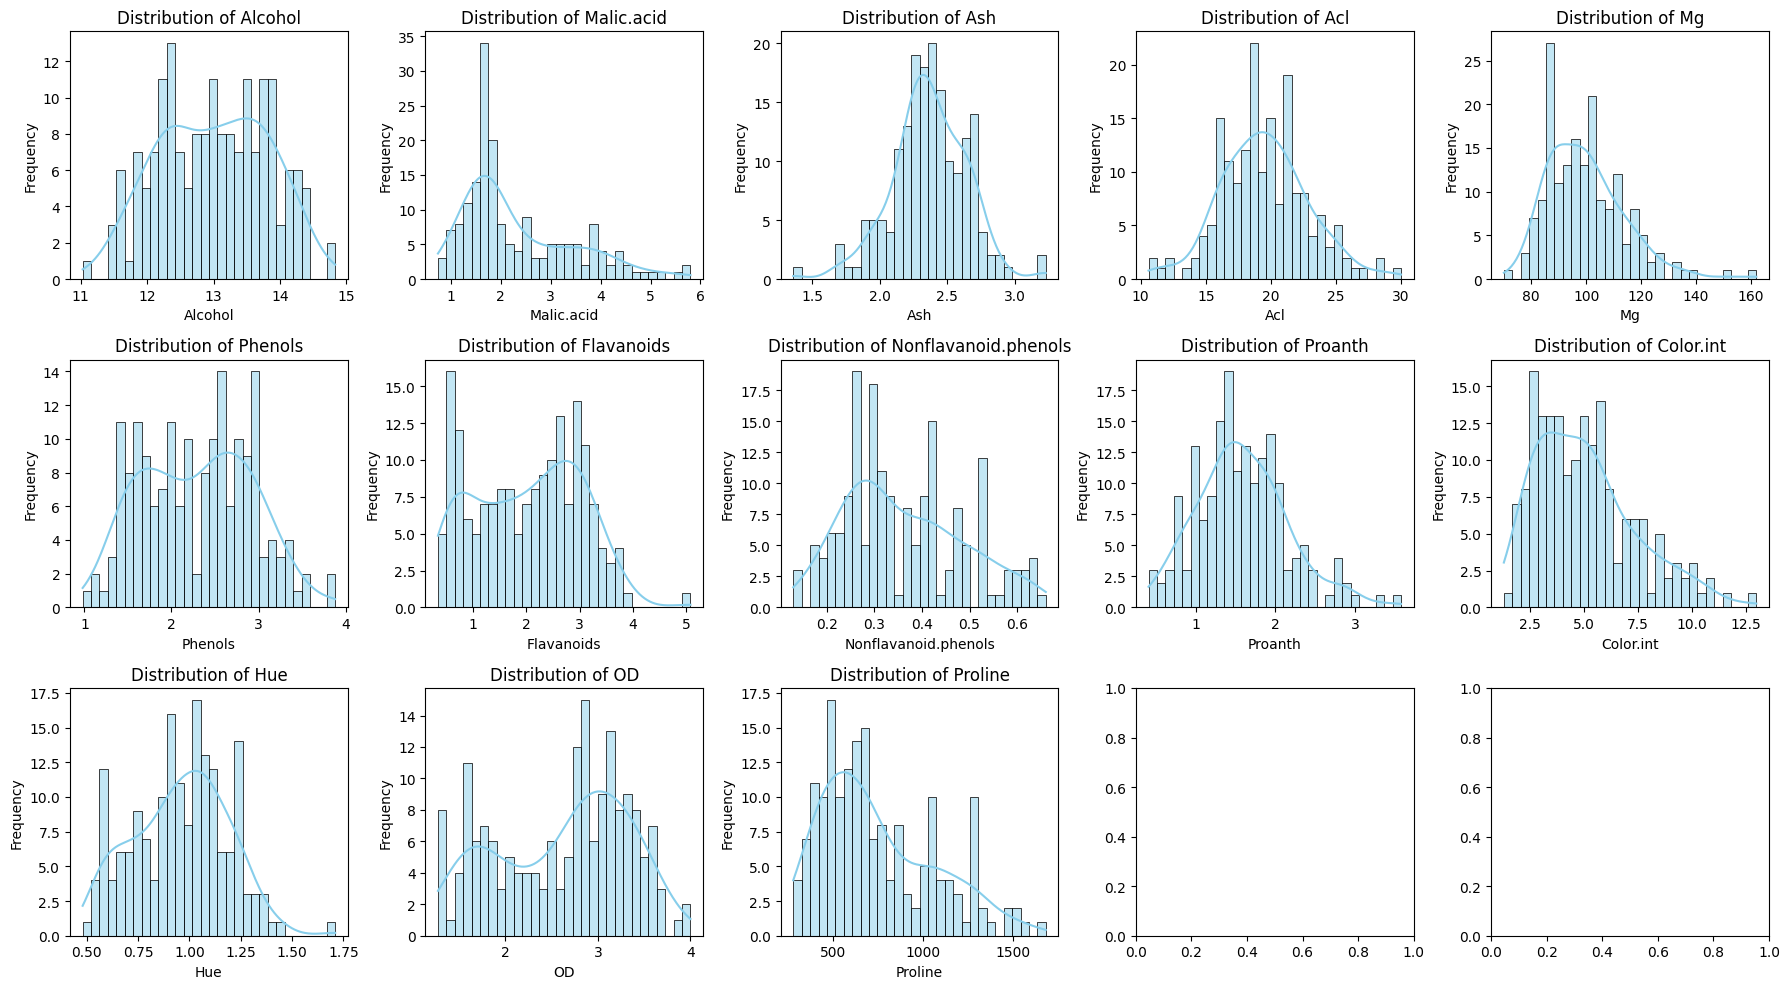

In [21]:
# Data Visualization Part

# Histograms

def histograms(wine_data):
    fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(18, 10))

    for i, column in enumerate(wine_data.columns[1:]):
        sns.histplot(wine_data[column], bins=30, kde=True, color='skyblue', ax=axes[i//5, i%5])
        axes[i//5, i%5].set_title(f'Distribution of {column}')
        axes[i//5, i%5].set_xlabel(column)
        axes[i//5, i%5].set_ylabel('Frequency')

    plt.tight_layout()
    plt.show()

histograms(wine_data)

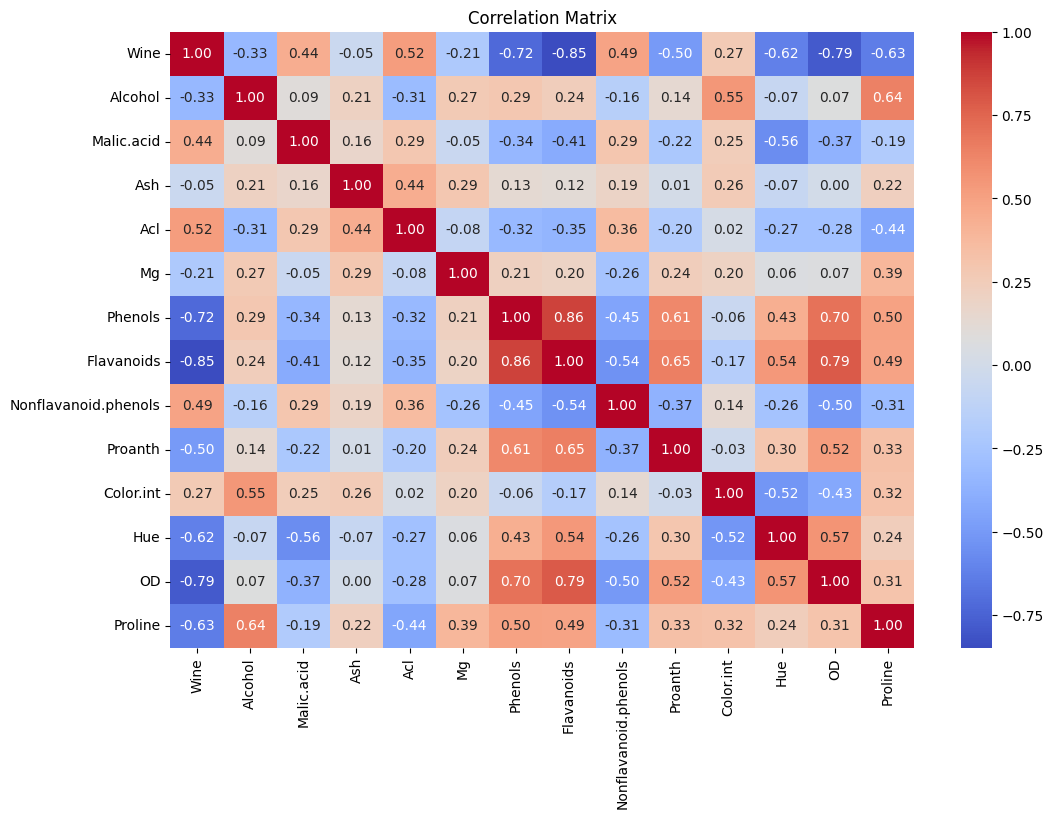

In [15]:
# Correlation Matrix

def correlation_matrix(wine_data):
    correlation_matrix = wine_data.corr()

    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Matrix')
    plt.show()

correlation_matrix(wine_data)

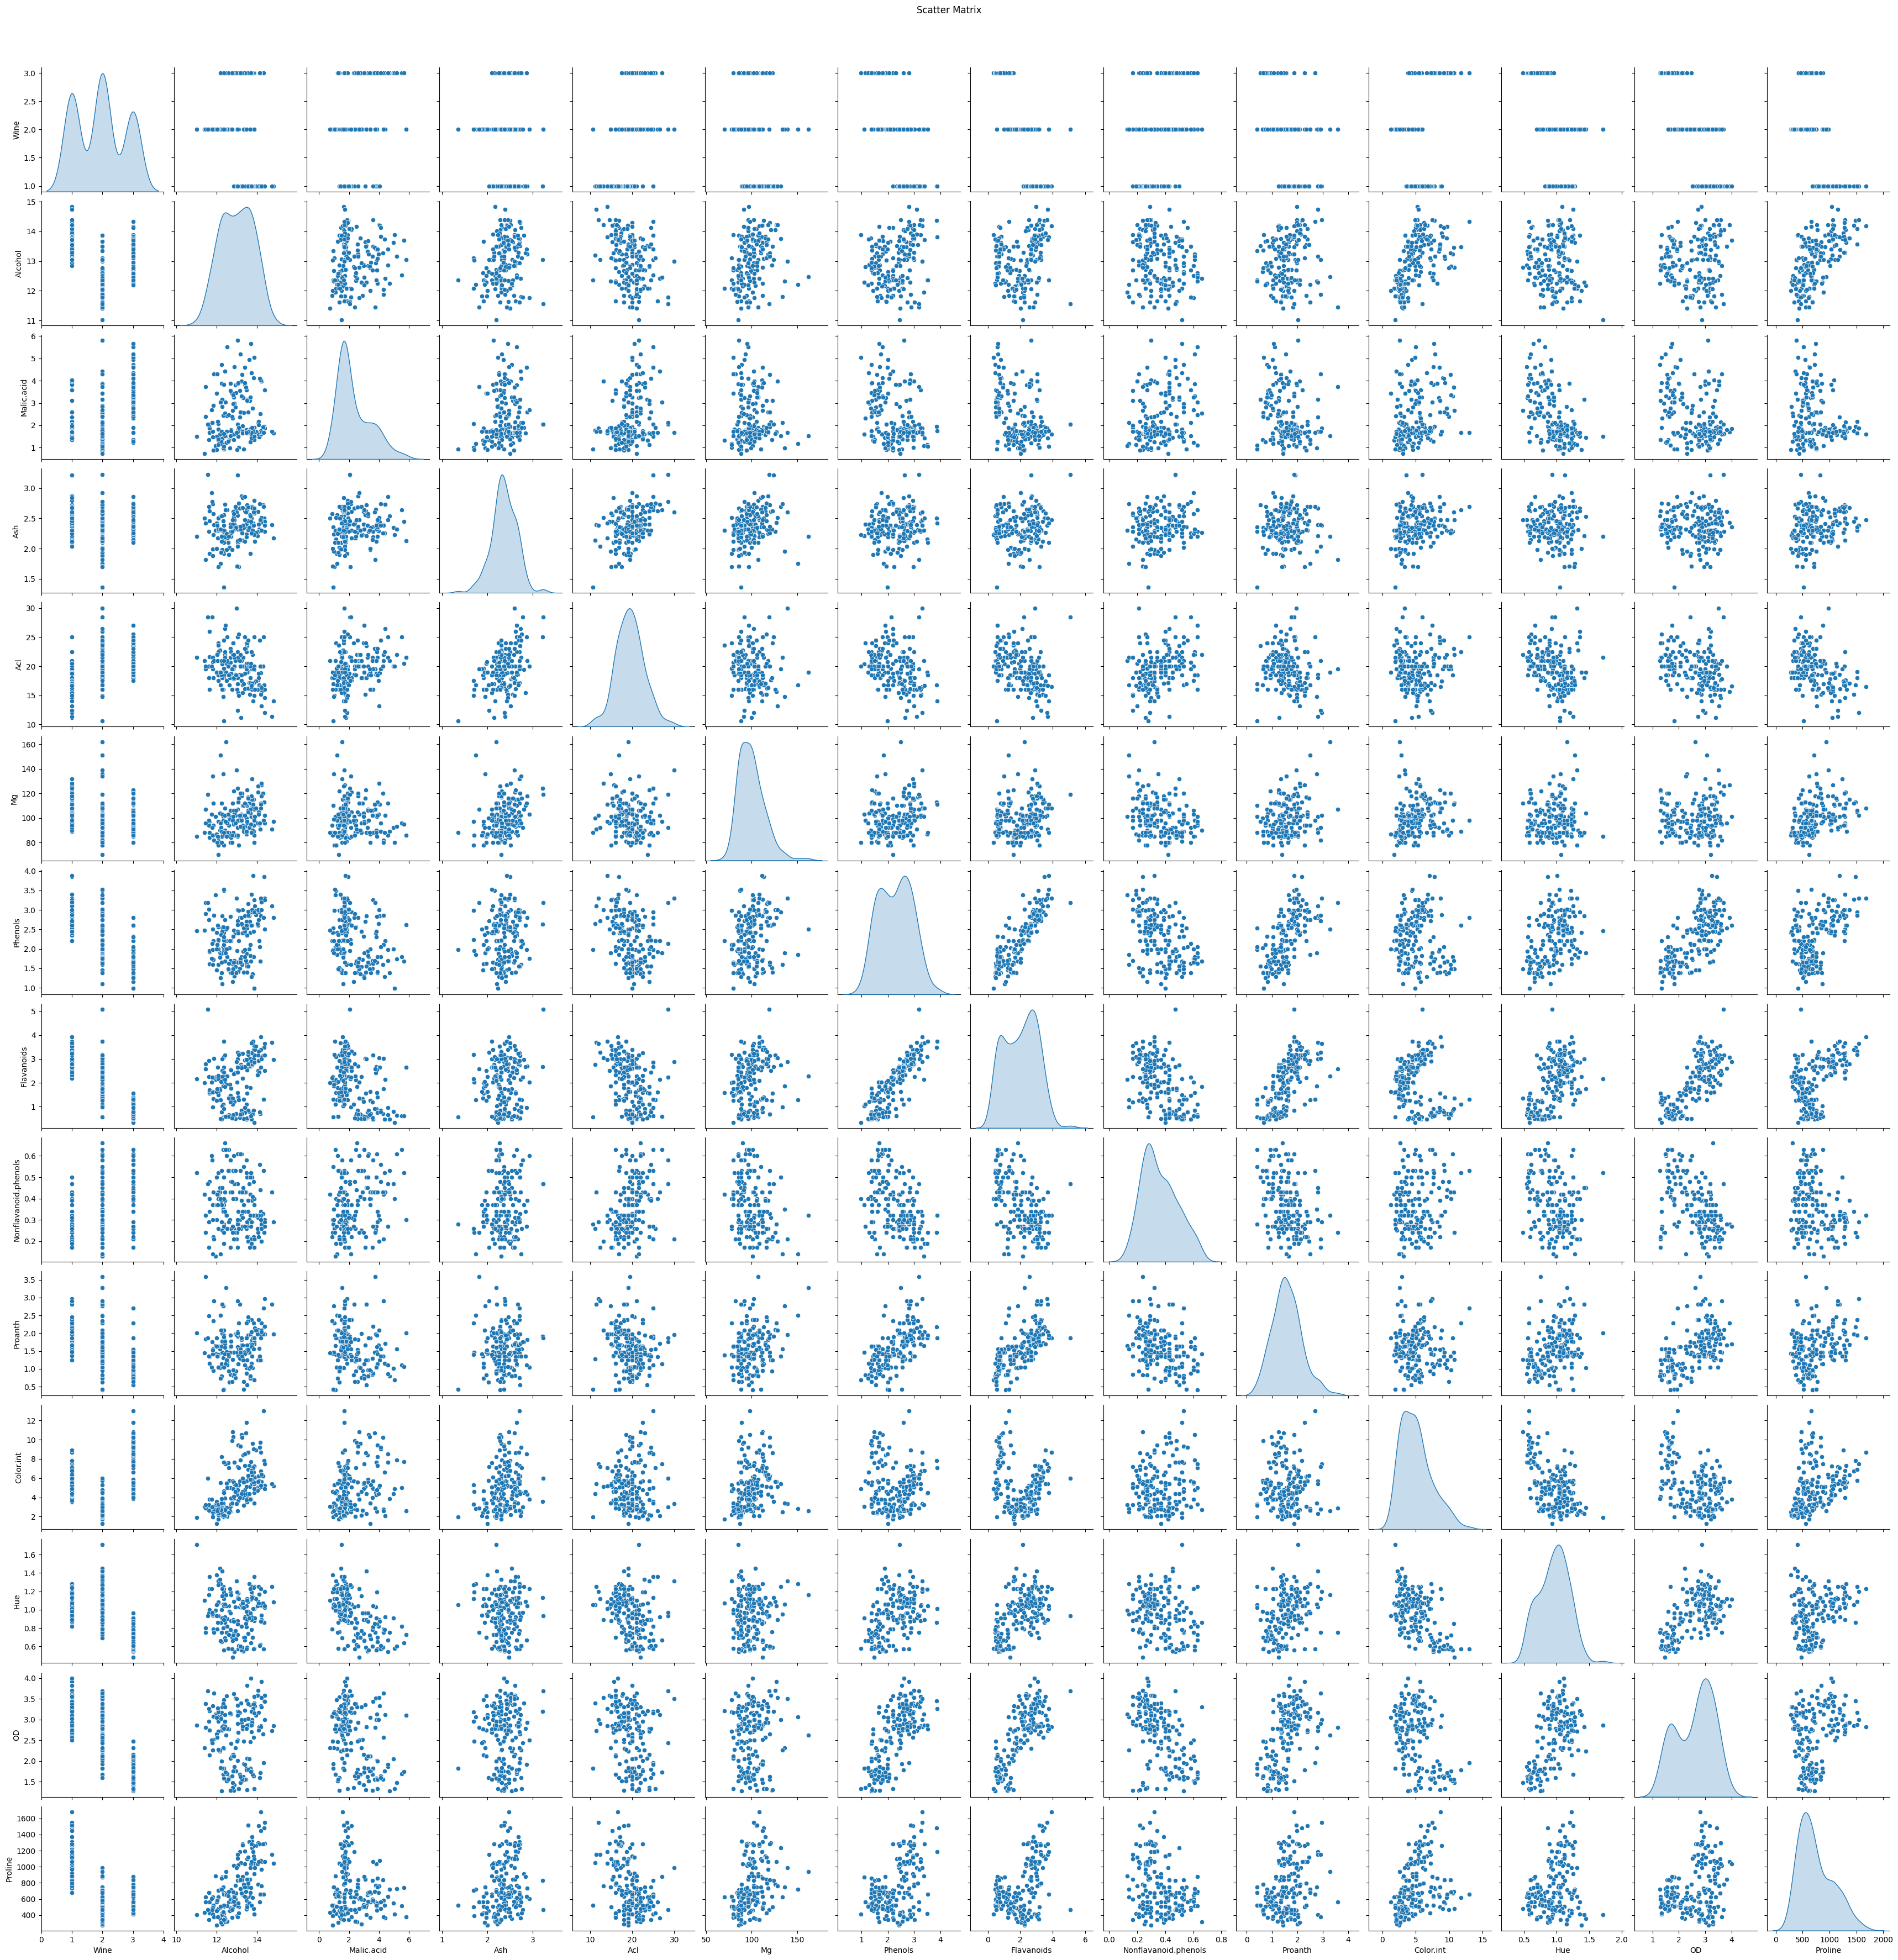

In [19]:
# Scatter Matrix

def scatter_matrix(wine_data):
    sns.pairplot(wine_data, diag_kind='kde')
    plt.suptitle('Scatter Matrix', y=1.02)
    plt.show()

scatter_matrix(wine_data)

R-squared score (Linear Regression): 0.6889364317843805
R-squared score (Random Forest Regression): 0.7416122628458712
     Actual Alcohol Content  Linear Reg Predictions  Random Forest Predictions
19                    13.64               13.539836                    13.4050
45                    14.21               13.726205                    13.6873
140                   12.93               12.785298                    13.1403
30                    13.73               13.542056                    13.8666
67                    12.37               12.721403                    12.8655
16                    14.30               13.738427                    13.8985
119                   12.00               12.221036                    11.8800
174                   13.40               13.174434                    13.1634
109                   11.61               12.474832                    12.3010
141                   13.36               13.084149                    13.0295


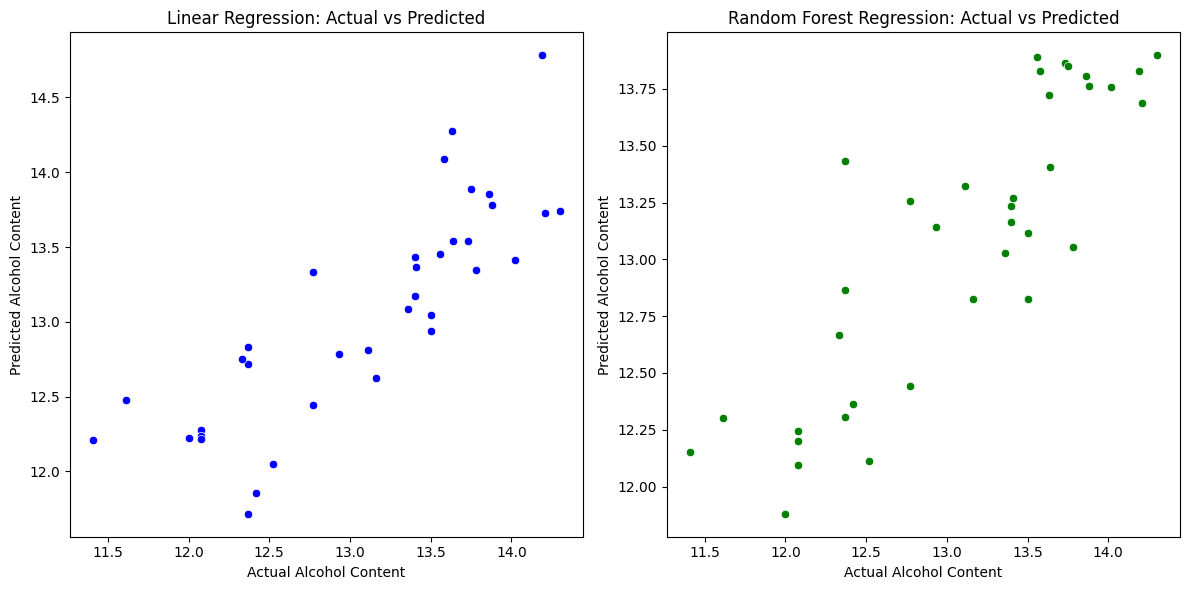

In [20]:
# Machine Learning Part

def predictions_and_evaluations(wine_data):
    # Feature selection
    features = wine_data.columns[2:]  # Exclude the first column ('Wine') and choose 'Alcohol' as the target
    target = 'Alcohol'

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(wine_data[features], wine_data[target], test_size=0.2, random_state=42)

    # Linear Regression model
    linear_reg_model = LinearRegression()
    linear_reg_model.fit(X_train, y_train)

    # Predictions on the test set
    y_pred_linear_reg = linear_reg_model.predict(X_test)

    # Evaluate Linear Regression model
    r2_linear_reg = r2_score(y_test, y_pred_linear_reg)
    print(f"R-squared score (Linear Regression): {r2_linear_reg}")

    # Random Forest Regression model
    random_forest_model = RandomForestRegressor(random_state=42)
    random_forest_model.fit(X_train, y_train)

    # Predictions on the test set
    y_pred_random_forest = random_forest_model.predict(X_test)

    # Evaluate Random Forest Regression model
    r2_random_forest = r2_score(y_test, y_pred_random_forest)
    print(f"R-squared score (Random Forest Regression): {r2_random_forest}")

    # Compare predictions with actual alcohol content
    comparison_df = pd.DataFrame({'Actual Alcohol Content': y_test, 'Linear Reg Predictions': y_pred_linear_reg, 'Random Forest Predictions': y_pred_random_forest})
    print(comparison_df.head(10))

    # Plotting predictions vs actual alcohol content
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    sns.scatterplot(x=y_test, y=y_pred_linear_reg, color='blue')
    plt.title('Linear Regression: Actual vs Predicted')
    plt.xlabel('Actual Alcohol Content')
    plt.ylabel('Predicted Alcohol Content')

    plt.subplot(1, 2, 2)
    sns.scatterplot(x=y_test, y=y_pred_random_forest, color='green')
    plt.title('Random Forest Regression: Actual vs Predicted')
    plt.xlabel('Actual Alcohol Content')
    plt.ylabel('Predicted Alcohol Content')

    plt.tight_layout()
    plt.show()

predictions_and_evaluations(wine_data)